# Import Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV data

In [57]:
# Assuming your CSV file is named 'house_price.csv' and contains columns 'HouseSize' and 'Price'
df = pd.read_csv('data.csv')

#  Step 2: Extract data

In [60]:
x_train = df['HouseSize'].values
x_train

array([2104, 1416, 1534,  852, 1427, 1200,  852, 1427, 1200,  852, 1427,
       1200,  852, 1427, 1200,  852, 1427, 1200,  852, 1427, 1200,  852,
       1427, 1200,  852, 1427, 1200], dtype=int64)

In [62]:
y_train = df['SalePrice'].values
y_train

array([460, 232, 315, 178, 214, 250, 178, 214, 250, 178, 214, 250, 178,
       214, 250, 178, 214, 250, 178, 214, 250, 178, 214, 250, 178, 214,
       250], dtype=int64)

In [64]:
m = len(y)  # number of training examples
m

27

In [66]:
# Reshape X to be a 2D array (matrix) for matrix operations in numpy
x_train= X.reshape(m, 1)
y_train = y.reshape(m, 1)

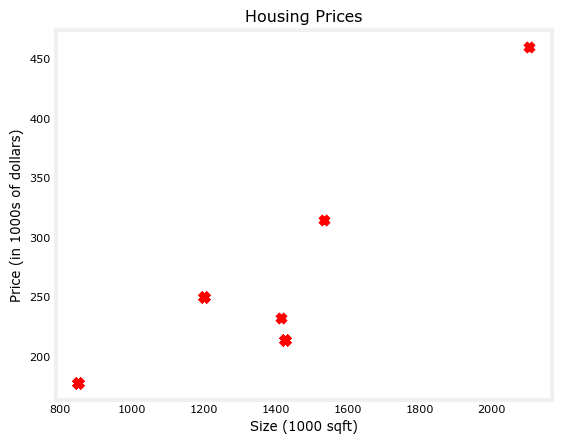

In [68]:
# Plot the data points
plt.scatter(X, y, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [70]:

i = 0 # Change this to 1 to see (x^1, y^1)
for i in range(m):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = ([2104], [460])
(x^(1), y^(1)) = ([1416], [232])
(x^(2), y^(2)) = ([1534], [315])
(x^(3), y^(3)) = ([852], [178])
(x^(4), y^(4)) = ([1427], [214])
(x^(5), y^(5)) = ([1200], [250])
(x^(6), y^(6)) = ([852], [178])
(x^(7), y^(7)) = ([1427], [214])
(x^(8), y^(8)) = ([1200], [250])
(x^(9), y^(9)) = ([852], [178])
(x^(10), y^(10)) = ([1427], [214])
(x^(11), y^(11)) = ([1200], [250])
(x^(12), y^(12)) = ([852], [178])
(x^(13), y^(13)) = ([1427], [214])
(x^(14), y^(14)) = ([1200], [250])
(x^(15), y^(15)) = ([852], [178])
(x^(16), y^(16)) = ([1427], [214])
(x^(17), y^(17)) = ([1200], [250])
(x^(18), y^(18)) = ([852], [178])
(x^(19), y^(19)) = ([1427], [214])
(x^(20), y^(20)) = ([1200], [250])
(x^(21), y^(21)) = ([852], [178])
(x^(22), y^(22)) = ([1427], [214])
(x^(23), y^(23)) = ([1200], [250])
(x^(24), y^(24)) = ([852], [178])
(x^(25), y^(25)) = ([1427], [214])
(x^(26), y^(26)) = ([1200], [250])


# Step 3: Implementing linear regression with one variable

## Model function
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

**Note: You can come back to this cell to adjust the model's w and b parameters**


In [74]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [77]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w, b (scalar): Model parameters
    Returns:
      y (ndarray (m,)): Target values
    """
    y_pred = w * x + b
    return y_pred

"""Now let's call the `compu
te_model_output` function and plot the output.."""

tmp_f_wb = compute_model_output(x_train, w, b,)
tmp_f_wb

array([[210500],
       [141700],
       [153500],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100],
       [ 85300],
       [142800],
       [120100]], dtype=int64)

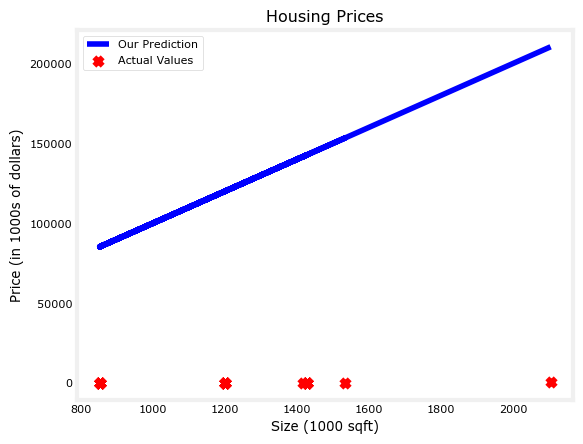

In [79]:
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


In [81]:
w = 200
b = 100
x_i = 1.2
cost_1200sqft = w * x_i + b
print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


# Step 4 Compute Cost

In [84]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [86]:
pip install matplotlib numpy pandas ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def compute_cost(x_train, y_train, w, b):
    predictions = w * x_train + b
    squared_errors = (predictions - y_train) ** 2
    cost = np.mean(squared_errors)
    return cost

def plot_regression_line(x_train, y_train, w, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Data Points')
    plt.xlabel('X_train')
    plt.ylabel('Y_train')
    
    # Plotting the regression line
    x_line = np.array([np.min(x_train), np.max(x_train)])
    y_line = w * x_line + b
    plt.plot(x_line, y_line, color='red', label='Regression Line')
    
    plt.title(f'Regression Line: w={w:.2f}, b={b:.2f}, Cost={compute_cost(x_train, y_train, w, b):.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plt_intuition(x_train, y_train):
    # Define initial values for w and b
    initial_w = 1.0
    initial_b = 0.0
    
    # Define ranges and steps for sliders
    w_slider = FloatSlider(min=-10.0, max=10.0, step=0.1, value=initial_w, description='w')
    b_slider = FloatSlider(min=-10.0, max=10.0, step=0.1, value=initial_b, description='b')
    
    # Define interactive function to update plot
    def update_plot(w, b):
        plot_regression_line(x_train, y_train, w, b)
    
    # Create interactive plot using sliders
    interact(update_plot, w=w_slider, b=b_slider)

# Example usage with dummy data
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 3, 4, 5, 6])

plt_intuition(x_train, y_train)


interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

In [101]:
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

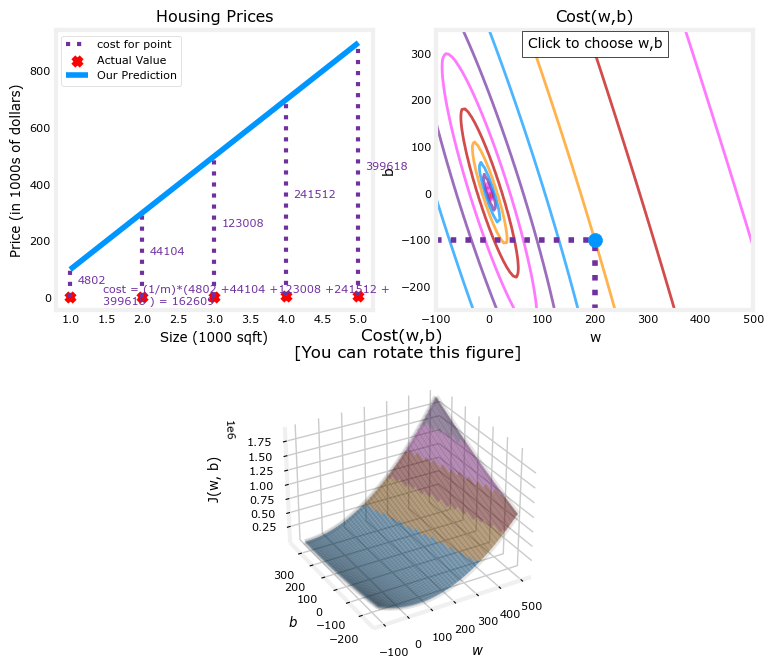

In [103]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

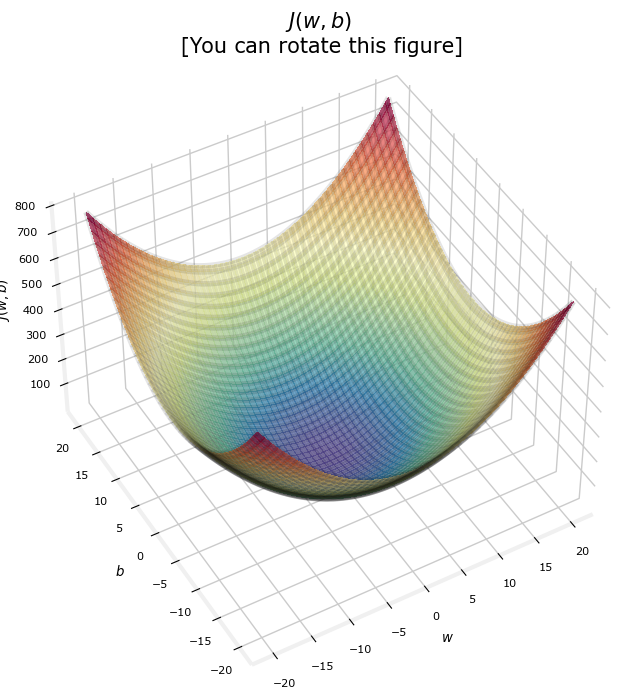

In [105]:
soup_bowl()

In [107]:
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients


In [109]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

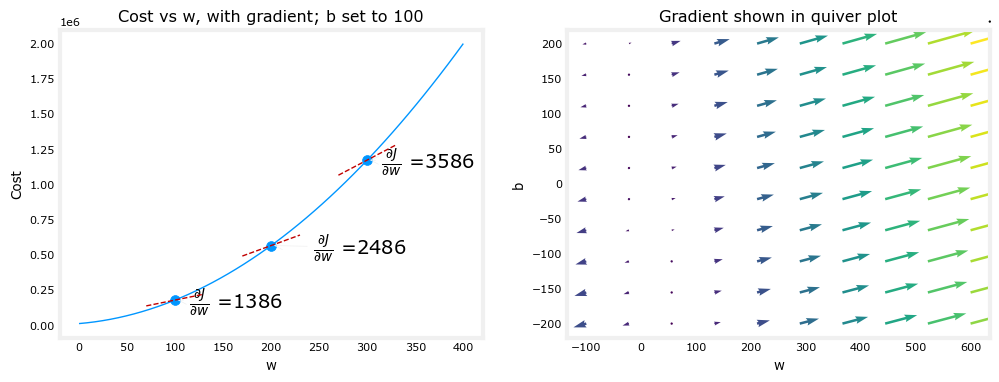

In [111]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [2]:
import math, copy
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")



NameError: name 'x_train' is not defined

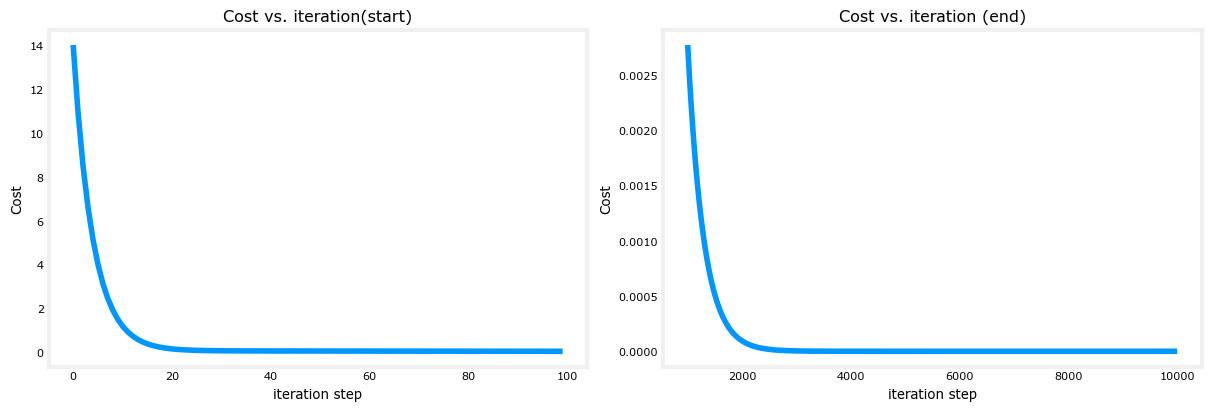

In [119]:

# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [121]:

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 2.0 Thousand dollars
1200 sqft house prediction 2.2 Thousand dollars
2000 sqft house prediction 3.0 Thousand dollars


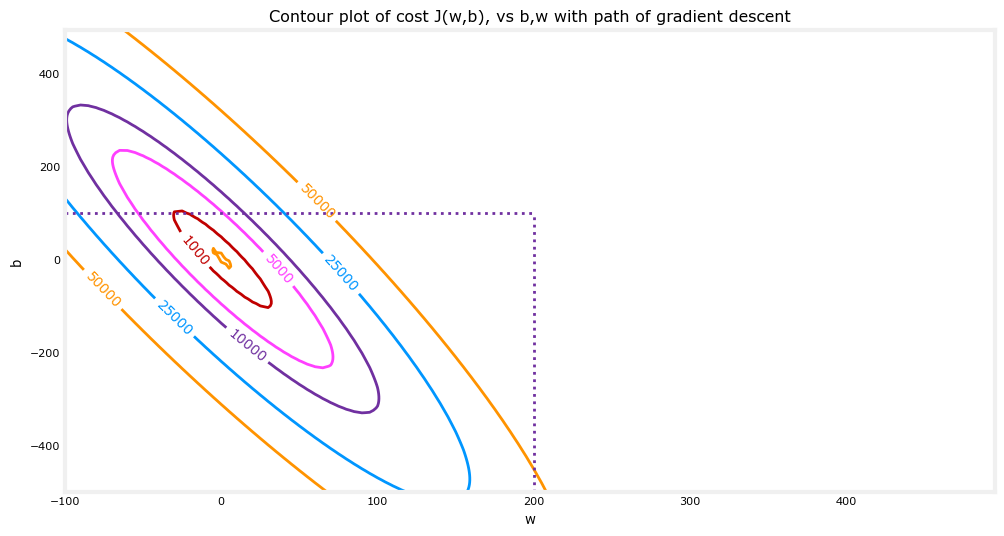

In [123]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

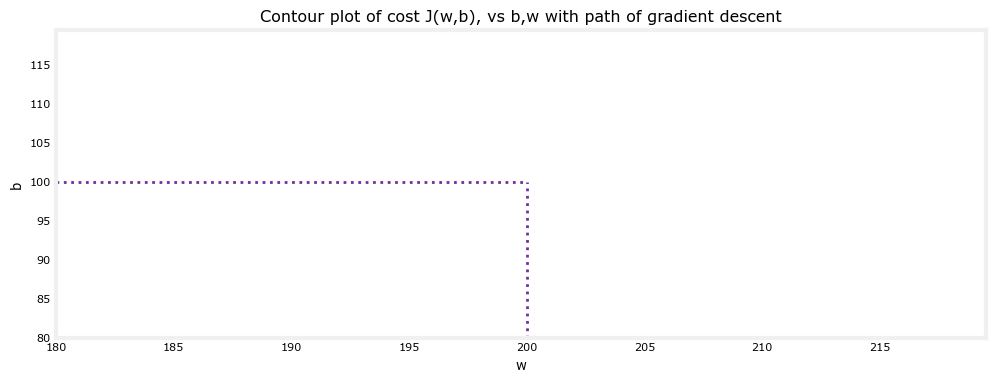

In [125]:

fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [127]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)


Iteration    0: Cost 1.28e+03  dj_dw: -1.400e+01, dj_db: -4.000e+00   w:  1.120e+01, b: 3.20000e+00
Iteration    1: Cost 9.20e+04  dj_dw:  1.188e+02, dj_db:  3.280e+01   w: -8.384e+01, b:-2.30400e+01
Iteration    2: Cost 6.59e+06  dj_dw: -1.005e+03, dj_db: -2.786e+02   w:  7.204e+02, b: 1.99808e+02
Iteration    3: Cost 4.72e+08  dj_dw:  8.510e+03, dj_db:  2.357e+03   w: -6.088e+03, b:-1.68591e+03
Iteration    4: Cost 3.38e+10  dj_dw: -7.204e+04, dj_db: -1.995e+04   w:  5.154e+04, b: 1.42768e+04
Iteration    5: Cost 2.42e+12  dj_dw:  6.098e+05, dj_db:  1.689e+05   w: -4.363e+05, b:-1.20843e+05
Iteration    6: Cost 1.74e+14  dj_dw: -5.162e+06, dj_db: -1.430e+06   w:  3.693e+06, b: 1.02292e+06
Iteration    7: Cost 1.24e+16  dj_dw:  4.369e+07, dj_db:  1.210e+07   w: -3.126e+07, b:-8.65875e+06
Iteration    8: Cost 8.92e+17  dj_dw: -3.698e+08, dj_db: -1.024e+08   w:  2.646e+08, b: 7.32942e+07
Iteration    9: Cost 6.39e+19  dj_dw:  3.131e+09, dj_db:  8.671e+08   w: -2.240e+09, b:-6.20418e+08


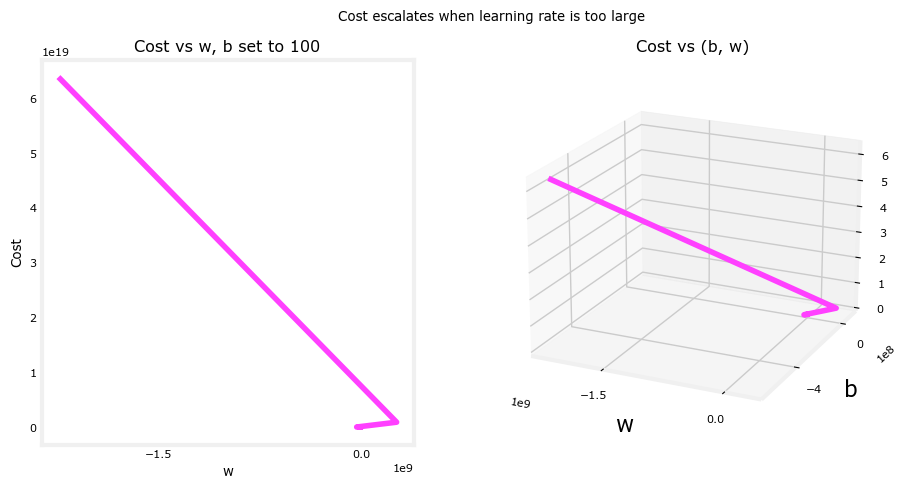

In [129]:

plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()
